### 1. Import package

In [51]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

### 2. Dataset

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [24]:
len(X_train[0,0])

28 * 28

784

In [23]:
X_train[:1]
# y_train[:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

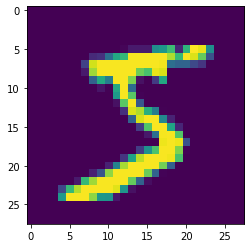

In [19]:
plt.imshow(X_train[0])

1


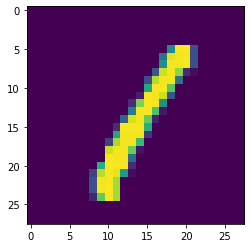

In [11]:
print(y_train[3])
X_train[3]

plt.imshow(X_train[3])

### 3. Preprocessing

In [27]:
X_train.min(), X_train.max()

(0, 255)

In [33]:
X_train_norm = (X_train - X_train.min()) / (X_train.max() - X_train.min())

In [34]:
X_train_norm[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [42]:
X_test_norm = (X_test) / X_test.max()

### 4. Modeling : CNN

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu', padding = "SAME",
                          input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', # binary_crossentropy
             metrics=['accuracy'])

In [39]:
14*14*32

6272

In [38]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
Total params: 63,562
Trainable params: 63,562
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
model.fit(X_train_norm, y_train,
         validation_data=[X_test_norm, y_test], 
         epochs=3)

Epoch 1/3
1875/1875 - 18s - loss: 0.0628 - accuracy: 0.9809 - val_loss: 0.0482 - val_accuracy: 0.9847 - 18s/epoch - 10ms/step
Epoch 2/3
1875/1875 - 19s - loss: 0.0467 - accuracy: 0.9855 - val_loss: 0.0434 - val_accuracy: 0.9857 - 19s/epoch - 10ms/step
Epoch 3/3
1875/1875 - 17s - loss: 0.0376 - accuracy: 0.9882 - val_loss: 0.0452 - val_accuracy: 0.9851 - 17s/epoch - 9ms/step


In [46]:
pred = model.predict(X_test)
pred

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
print(np.argmax(pred[10]))
pred[10]

0


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

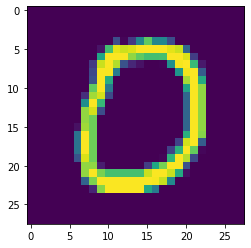

In [58]:
plt.imshow(X_test[10])